<b>ФБ-21 Альгішиєв Дмитро</b>
<b><h1>Лабораторна робота №6</h1></b>
<b>"Засоби підготовки та аналізу даних"</b>





In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Завдання 1</h2>
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

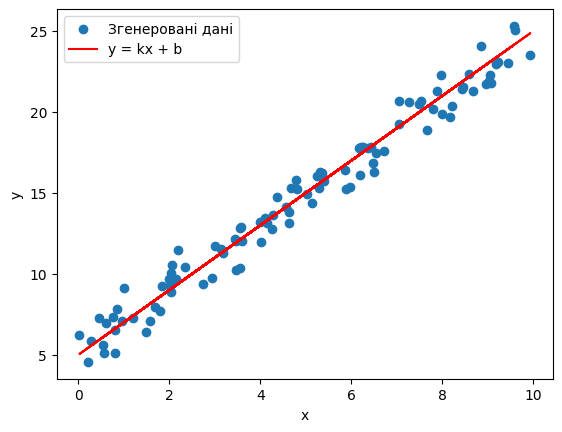

In [2]:

k = 2
b = 5
n = 100


x = np.random.rand(n) * 10  # Незалежна змінна(на основі якої ми робимо прогноз)
epsilon = np.random.randn(n)  # Шум
y = k * x + b + epsilon  # Залежна змінна(яку ми намагаємось передбачити)


plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, k * x + b, color='red', label='y = kx + b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок ^k та ^b.
(формули в методичці)

In [3]:
def least_squares_method(x, y):

    #середні значення
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    

    k_caret = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    

    b_caret = y_mean - k_caret * x_mean
    
    return k_caret, b_caret

k_caret, b_caret = least_squares_method(x, y)
print('^k: ', k_caret) #Оцінка нахилу
print('^b: ', b_caret) #Оцінка зсуву.


^k:  1.931849254031176
^b:  5.24825514885452


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [4]:

polyfit_params = np.polyfit(x, y, 1)
k_polyfit, b_polyfit = polyfit_params

print(f"Початкові параметри: k = {k}, b = {b}")
print(f"Знайдені параметри методом найменших квадратів: ^k = {k_caret}, ^b = {b_caret}")
print(f"Оцінка параметрів за допомогою np.polyfit: k = {k_polyfit}, b = {b_polyfit}")

Початкові параметри: k = 2, b = 5
Знайдені параметри методом найменших квадратів: ^k = 1.931849254031176, ^b = 5.24825514885452
Оцінка параметрів за допомогою np.polyfit: k = 1.9318492540311762, b = 5.24825514885452


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо вигенерували вхідні дані навколо лінії, відобразіть також її.

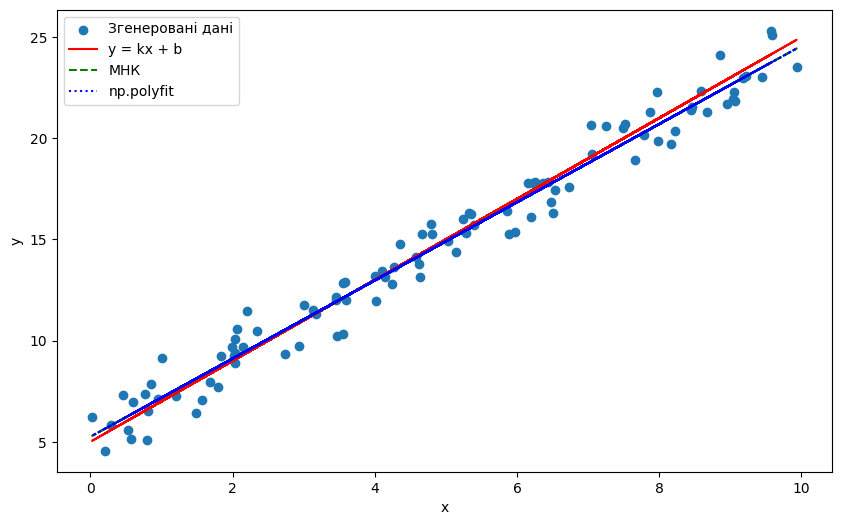

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, k * x + b, color='red', label='y = kx + b')
plt.plot(x, k_caret * x + b_caret, color='green', linestyle='--', label='МНК') #метод найменших квадратів
plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2>Завдання 2</h2>
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок ^k та ^b. Визначіть оптимальні вхідні параметри: <b>learning_rate<.b>, <b>n_iter</b>

In [6]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    k_caret = 0
    b_caret = 0
    n = len(x)
    loss_values = []
    
    for _ in range(n_iter): 
        y_pred = k_caret * x + b_caret
        
        loss = np.sum((y - y_pred) ** 2) / n #MSE
        loss_values.append(loss)
        
        grad_b0 = -2/n * np.sum(y - y_pred)
        grad_b1 = -2/n * np.sum(x * (y - y_pred))
        
        b_caret -= learning_rate * grad_b0
        k_caret -= learning_rate * grad_b1
        
    return k_caret, b_caret, loss_values


learning_rate = 0.01
n_iter = 500

k_gd, b_gd, loss_values = gradient_descent(x, y, learning_rate, n_iter)
print('^k_gd: ', k_gd) # Оцінка нахилу
print('^b_gd: ', b_gd) # Оцінка зсуву


^k_gd:  1.9926963751380455
^b_gd:  4.85854879126105


2. Додайте отриману лінію регресії на загальний графік

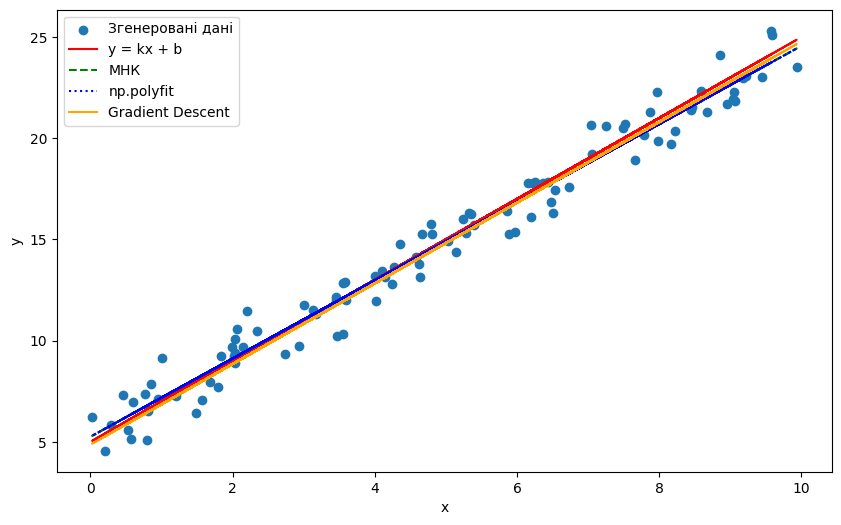

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Згенеровані дані')
plt.plot(x, k * x + b, color='red', label='y = kx + b')
plt.plot(x, k_caret * x + b_caret, color='green', linestyle='--', label='МНК')
plt.plot(x, k_polyfit * x + b_polyfit, color='blue', linestyle=':', label='np.polyfit')
plt.plot(x, k_gd * x + b_gd, color='orange', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

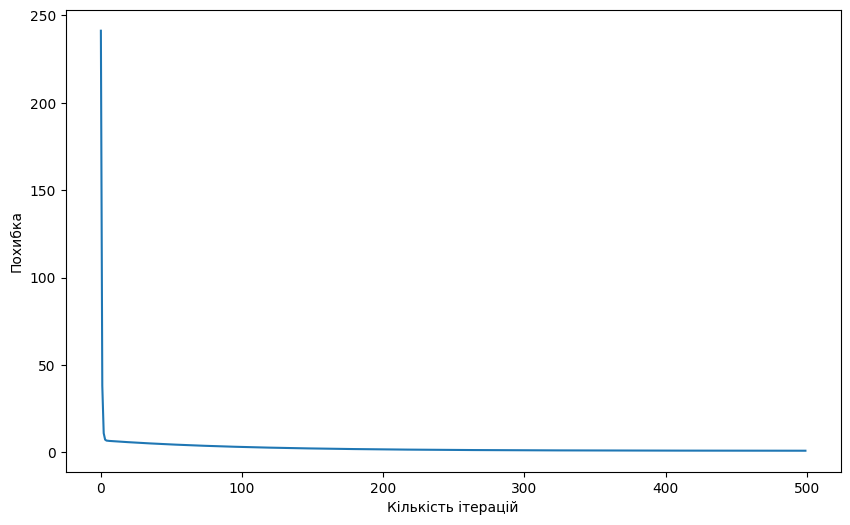

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(loss_values)
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.show()


4. Порівняйте отримані результати з результатами попереднього завдання

In [9]:
results = {
    "МНК": (k_caret, b_caret),
    "Polyfit": (k_polyfit, b_polyfit),
    "Gradient Descent": (k_gd, b_gd)
}
print(results)

{'МНК': (1.931849254031176, 5.24825514885452), 'Polyfit': (1.9318492540311762, 5.24825514885452), 'Gradient Descent': (1.9926963751380455, 4.85854879126105)}
